# Clusterização

Clusterização é o primeiro algoritmo que estudaremos que trabalha com dados ditos "não rotulados", ou seja, que não possuem uma saída esperada. Por conta disso a clusterização é chamada de "não supervisionada".
        
O objetivo da clusterização é agrupar os dados de acordo com semelhanças apresentadas entre eles. Um exemplo de aplicação da clusterização é a clusterização de produtos, onde as empresas procuram identificar semelhanças entre seus produtos para promoverem estratégias de vendas mais assertivas. 
Ao longo desse módulo veremos três grandes estratégias de Clusterização.
        
## Tipos de Cluster
De um modo geral,  a clusterização pode ser dividida em dois subgrupos:

* **Cluster Difícil**: No cluster difícil, cada ponto de dados ou pertence a um cluster completamente ou não. 
* **Cluster flexível**: No cluster flexível, em vez de colocar cada ponto de dados em um cluster separado, uma probabilidade de que o ponto de dados esteja nesses clusters é atribuída.


## Modelos de algoritmos de Clusterização
Como a tarefa de agrupamento é subjetiva, os meios que podem ser usados para atingir esse objetivo são muitos. Toda metodologia segue um conjunto diferente de regras para definir a ‘similaridade’ entre os pontos de dados. De fato, existem mais de 100 algoritmos de clusterização conhecidos. Mas poucos dos algoritmos são usados, vamos comentar os principais:
* **Modelos de conectividade**: Como o nome sugere, esses modelos baseiam-se na noção de que os dados apontados mais de perto no espaço de dados exibem mais semelhanças entre si do que os pontos de dados mais distantes.

* **Modelos centróides**: são algoritmos iterativos de clustering nos quais a noção de similaridade é derivada pela proximidade de um ponto de dados ao centróide dos clusters

* **Modelos de distribuição**:  Esses modelos de armazenamento em cluster são baseados na noção de como é provável que todos os pontos de dados no cluster pertençam à mesma distribuição (por exemplo: Normal, Gaussian). Esses modelos geralmente sofrem de overfitting.

* **Modelos de densidade**: esses modelos pesquisam o espaço de dados para áreas de densidade variada de pontos de dados no espaço de dados. Ele isola várias regiões de densidade diferentes e atribui os pontos de dados dentro dessas regiões no mesmo cluster.




In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

## 1. Clusterização k-Means.
Começando pela forma mais simples de clusterização, a clusterização k-Means utiliza o modelo de Centróides para particionar os dados em k grupos com base nas distâncias dos dados entre si. Então os centróides são inicializados de forma aleatória e, iterativamente, vão mudando para minimizar a distância do dado dentro do próprio cluster, e maximizar a distância entre clusters.
   Considere o problema de segmentar clientes entre grupos,


In [2]:
cust_df = pd.read_csv("Cust_Segmentation.csv").drop(columns="Unnamed: 0")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


## 1.1. Normalizando a base de dados
Primeiramente, vamos normalizar nossa base de dados. A normalização é um método estatístico que ajuda algoritmos a interpretar dados com diferentes magnitudes de forma igualitária. Utilizaremos a função **StandardScaler()** para normalizar a base.

In [3]:
from sklearn.preprocessing import StandardScaler
X = cust_df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)

## 1.2. Modelando

Identificar manualmente cada grupo pela idade, renda, nível educacional etc, exigiria inúmeros testes e experimentos. No entanto, utilizando a K-means clustering o processo se torna muito mais rápido e fácil.

A classe KMeans possui vários parâmetros, mas utilizaremos esses três:
<ul>
    <li> <b>init</b>: Método de inicialização dos centróides. </li>
    <ul>
        <li> k-means++: Seleciona o centro do cluster inicial de uma forma inteligente, para acelerar a convergência do algotirmo.</li>
    </ul>
    <li> <b>n_clusters</b>: Número final de clusters a ser formado, assim como o número de centróides gerados </li>
    <li> <b>n_init</b>: Quantidade de vezes que o algoritmo irá rodar com diferentes inicializações para os centróides. O resultado final será a melhor saída das n inicializações. </li>
</ul>

In [4]:
from sklearn.cluster import KMeans

clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_

## 1.3. Exibindo resultados

Após aplicar o algoritmo e tendo escolhido 3 clusters, podemos concluir que os três grupos principais, identificados pelo algoritmo como tendo a maior distância entre si, são:

*   Alta Renda, Alta educação e Idade avançada
*   Meia idade e Renda Média
*   Jovem e Baixa Renda

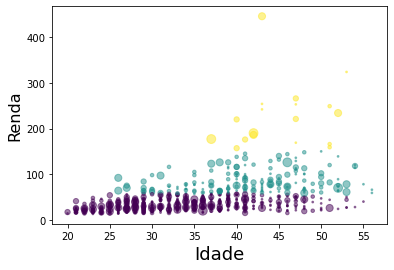

In [5]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), alpha=0.5)
plt.xlabel('Idade', fontsize=18)
plt.ylabel('Renda', fontsize=16)
plt.show()

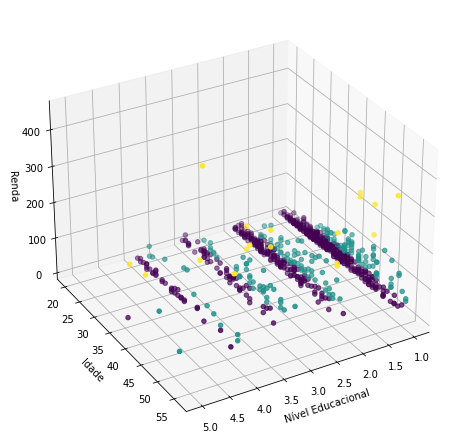

In [6]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=60, auto_add_to_figure=False)
fig.add_axes(ax)
plt.cla()
ax.set_xlabel('Nível Educacional')
ax.set_ylabel('Idade')
ax.set_zlabel('Renda')
ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(float))
plt.show()

## 2. Clusterização Hierárquica

O clustering hierárquico é um algoritmo que utiliza do modelo de  Conectividade para construir hierarquias de clusters. Esse algoritmo começa com todos os pontos de dados atribuídos a um cluster próprio. Em seguida, dois clusters mais próximos são conectados a um mesmo cluster. No final, esse algoritmo termina quando há apenas um único cluster. A clusterização Hierárquica é um algoritmo "bottom up", ou seja, inicia no dado mais específico e realiza operações até chegar no agrupamento mais geral.


    

### 2.1. Carregando base de dados e normalizando

Para exemplificar a clusterização hierárquica, utilizaremos uma base de dados sobre veículos, em que o fabricante deseja identificar clusters no mercado para saber em que categoria seus veículos estarão competindo, sendo capaz de criar estratégias competitivas específicas para aquela categoria.
(carregar base já limpa)

In [7]:
from sklearn.preprocessing import MinMaxScaler

pdf = pd.read_csv('cars_clus.csv').drop(columns='Unnamed: 0')
featureset = pdf[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]
x = featureset.values
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)

### 2.2. Aplicando modelo

Utilizaremos a biblioteca scikit-learn para realizar a clusterização, mas a biblioteca Scipy também oferece ferramentas para realizar

In [8]:
from sklearn.metrics.pairwise import euclidean_distances
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import ClusterWarning
from warnings import simplefilter

simplefilter("ignore", ClusterWarning)
dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

### 2.3. Visualizando resultados

Graficamente, os agrupamentos podem ser vistos como dendogramas. Após os resultados, observamos três clusters principais que podem ser destacados:

  **Carros**
   * Cluster 1: Com baixo consumo de combustível (km/L) e baixa quantidade de cavalos de poder
   * Cluster 2: Com consumo de combustível e cavalos moderados, mas preço acima da média.
   * Cluster 3: Com alto consumo de combustível e quantidade de cavalos, maior preço.
    
**Caminhões**
   * Cluster 1: Com baixo consumo de combustível (km/L) e baixa quantidade de cavalos de poder e menor preço.
   * Cluster 2: Com alto consumo de combustível, quantidade de cavalos moderada, e maior preço.
   
   * Cluster 3: Com consumo de combustível e cavalos moderados, preço baixo.

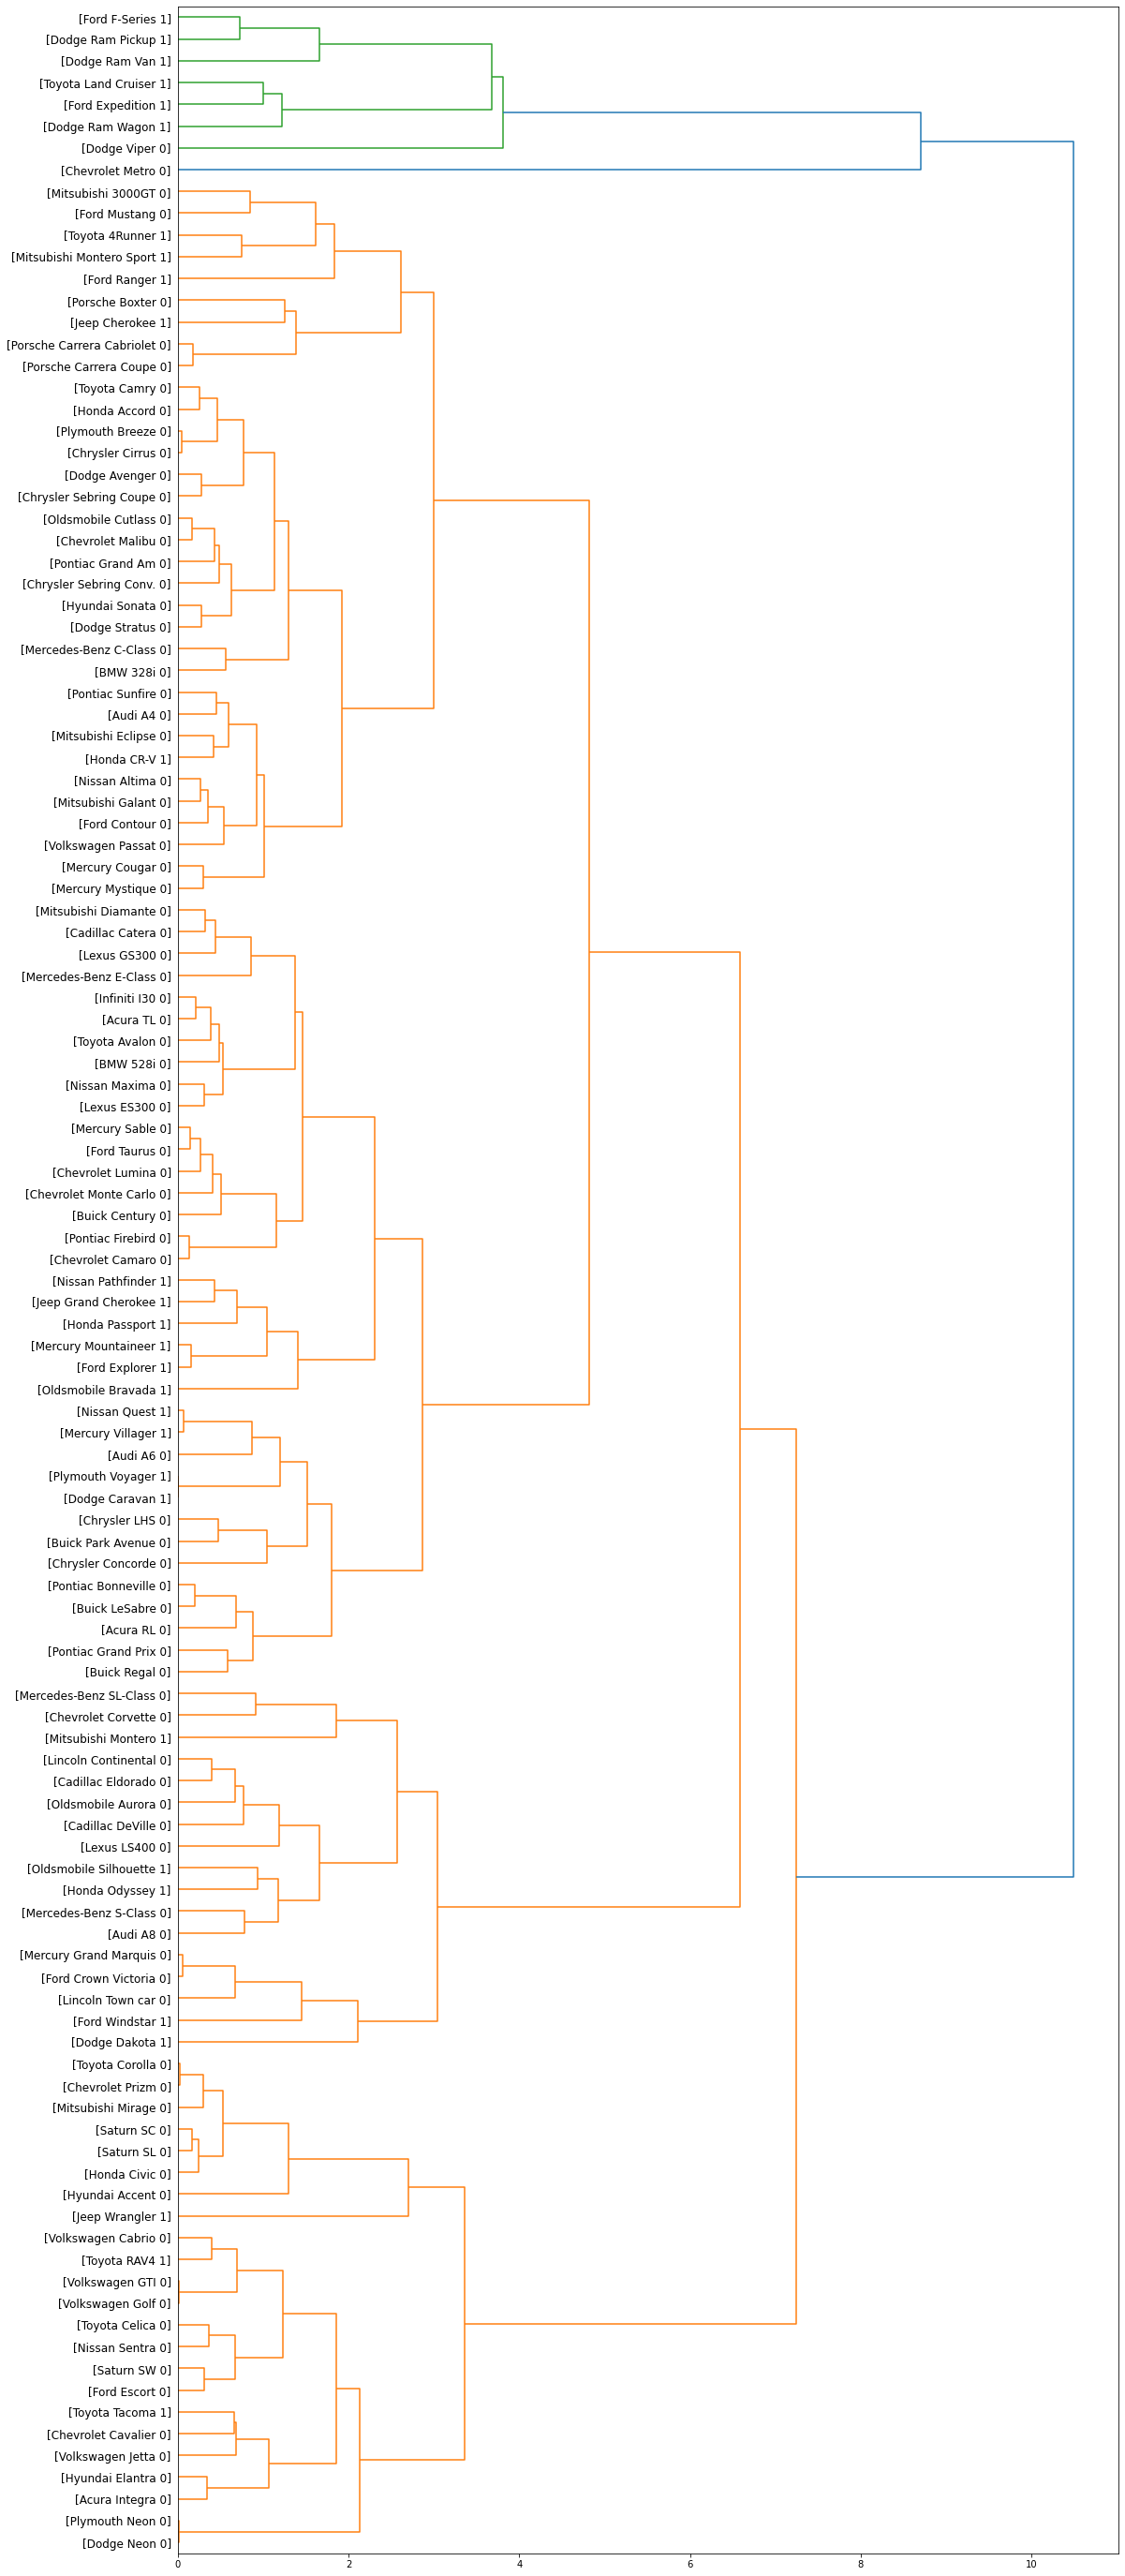

In [9]:
import pylab
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id], int(float(pdf['type'][id])) )
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

## 3. DBSCAN

A Clusterização Espacial baseada em Densidade de aplicações com ruído, ou DBSCAN (Density-based spatial clustering of applications with noise) é o principal algoritmo de clusterização baseado no modelo de densidade.

É significativamente efetivo para identificar clusters de
formato arbitrário e de diferentes tamanhos, identificar e separar os ruídos dos dados, detectar clusters “naturais” e seus arranjos dentro do espaço de dados, sem qualquer informação preliminar sobre os grupos.

O algoritmo atua de forma iterativa e, para cada ponto de um cluster, a vizinhança para um dado raio contém, no mínimo, certo número de pontos, ou seja, a densidade na vizinhança tem que exceder um limiar para ser integrado ao cluster.

Este algoritmo atua muito bem em situações em que nossos dados estão distribuídos espacialmente. Como exemplo, utilizaremos uma base de dados sobre o clima em diferentes localizações no Canadá

In [10]:
# Se você não possuir a biblioteca da basemap instalado, descomente e execute este bloco de código
# !pip install basemap==1.3

In [11]:
pdf = pd.read_csv('Weather_stations.csv')
pdf = pdf[pd.notnull(pdf["Tm"])].reset_index(drop=True)
pdf.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710


### 3.1 Visualizando dados

É possível observar no mapa a seguir pontos em vermelho, que representam a média das temperaturas máximas, auferidas ao longo do ano para cada estação.

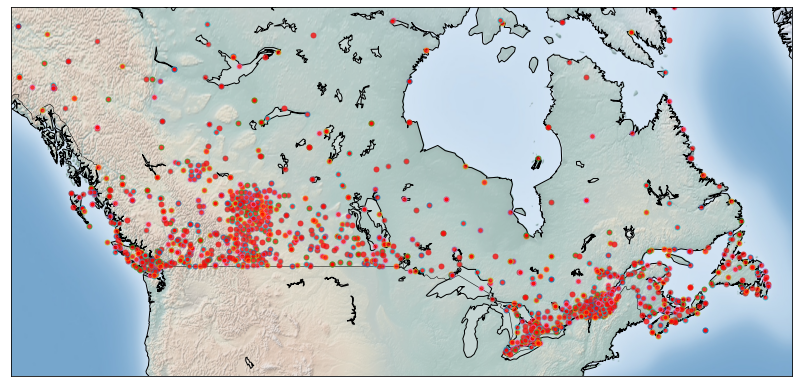

In [12]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

# Definindo parâmetros de latitude e longitude
llon=-140
ulon=-50
llat=40
ulat=65

# Extraindo dados da base que estão dentro dos limites de latitude e longitude
pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]

# Criando a projeção dos pontos da base no mapa disponível na biblioteca
my_map = Basemap(projection='merc', resolution = 'l', area_thresh = 1000.0, llcrnrlon=llon, llcrnrlat=llat, urcrnrlon=ulon, urcrnrlat=ulat) 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()      
xs,ys = my_map(np.asarray(pdf.Long), np.asarray(pdf.Lat))
pdf.loc[:, 'xm']= xs.tolist()
pdf.loc[:, 'ym'] =ys.tolist()

# Criando a visualização dos pontos no mapa
for index,row in pdf.iterrows():
    my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
plt.show()

### 3.2. Aplicando o algoritmo DBSCAN

Nosso objetivo é separar as regiões em clusters, com base na localização dos pontos e em suas temperaturas médias.

In [13]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['xm','ym','Tx','Tm','Tn']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Computando o algoritmo DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf.loc[:, "Clus_Db"] = labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 

### 3.3. Visualização dos Clusters Resultantes

É possível visualizar no mapa diferentes clusters, separados por localização e temperatura. Dessa forma, é possível compreender com mais precisão as características climáticas do Canadá e também suas distribuições populacionais.

Cluster 0, Temp Média: 6.2211920529801334
Cluster 1, Temp Média: 6.790000000000001
Cluster 2, Temp Média: -0.49411764705882355
Cluster 3, Temp Média: -13.877209302325586
Cluster 4, Temp Média: -4.186274509803922
Cluster 5, Temp Média: -16.301503759398482
Cluster 6, Temp Média: -13.599999999999998
Cluster 7, Temp Média: -9.753333333333334
Cluster 8, Temp Média: -4.258333333333334


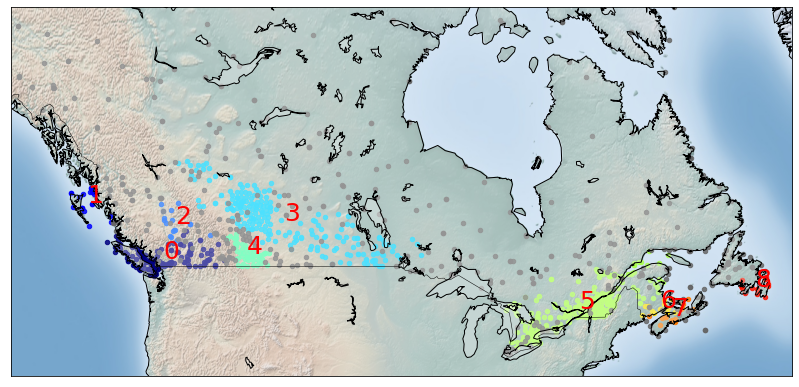

In [14]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, 
            urcrnrlon=ulon, urcrnrlat=ulat) 

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=25, color='red',)
        print ("Cluster "+str(clust_number)+', Temp Média: '+ str(np.mean(clust_set.Tm)))

## Considerações Finais

Ao fim desse módulo, é esperado que o conceito de clusterização tenha sido totalmente compreendido. É importante ressaltar que existem inúmeras formas de se realizar uma clusterização, inclusive sem utilizar algoritmos de machine learning.

É importante que, a partir dos diferentes algoritmos apresentados, tenha sido possível compreender os modelos de clusterização mais comuns, gerando certa autonomia para o caso de haver necessidade de aprender novos algoritmos de clusterização.

Isso é tudo, espero que tenham gostado! Até o próximo módulo.